In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-3-cd3f5bf549c2>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Predicted Amount'] = model.predict(X_train)
<ipython-input-3-cd3f5bf549c2>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Amount'] = y_pred
<ipython-input-3-cd3f5bf549c2>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

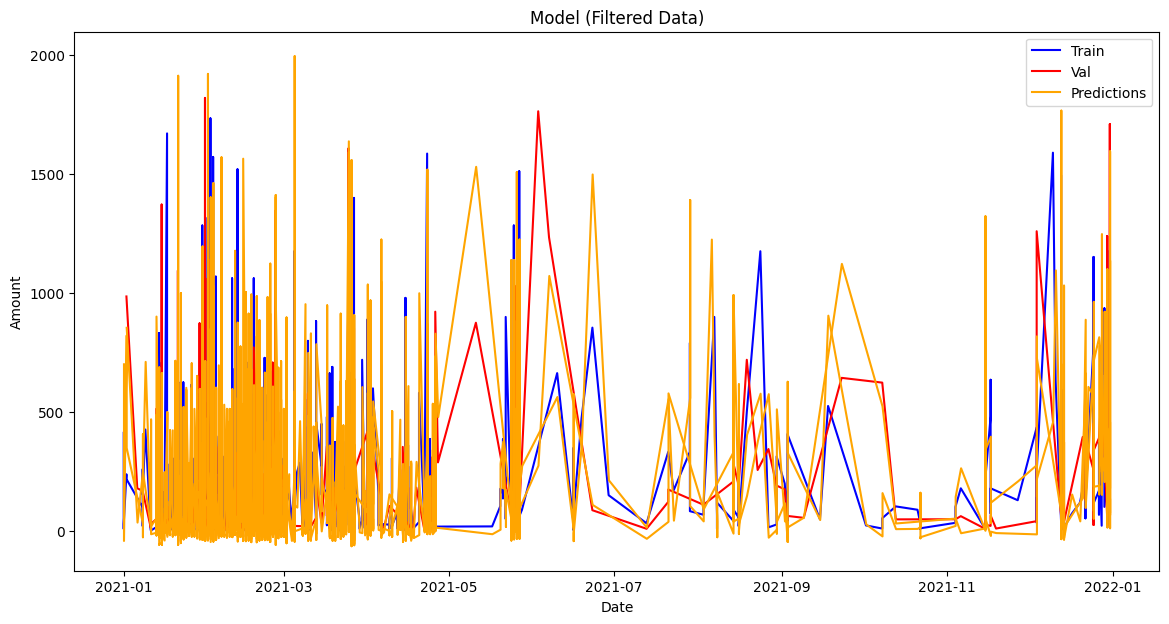

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data Mining Project/sales short.xlsx'
data = pd.read_excel(file_path)

# Preprocess the data
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data['Branch Code'] = data['Branch Code'].astype('category').cat.codes
data['Shop Name'] = data['Shop Name'].astype('category').cat.codes
data['Customer Name'] = data['Customer Name'].astype('category').cat.codes
data['Sales Person Name'] = data['Sales Person Name'].astype('category').cat.codes
data['Cashier Name'] = data['Cashier Name'].astype('category').cat.codes
data['Sales Type'] = data['Sales Type'].astype('category').cat.codes

# Feature selection
features = ['Quantity', 'Item Code', 'Branch Code', 'Shop Name', 'Customer Name',
            'Sales Person Name', 'Cashier Name', 'Sales Type', 'Unit Price']
X = data[features]
y = data['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Prepare the data for visualization
train_data = data.iloc[X_train.index]
test_data = data.iloc[X_test.index]
train_data['Predicted Amount'] = model.predict(X_train)
test_data['Predicted Amount'] = y_pred

# Combine actual and predicted data for plotting
train_data['Type'] = 'Train'
test_data['Type'] = 'Test'
combined_data = pd.concat([train_data, test_data])

# Sort by date for proper plotting
combined_data = combined_data.sort_values(by='Date')

# Remove outliers: keep only rows where Amount and Predicted Amount are less than 2000
filtered_data = combined_data[(combined_data['Amount'] < 2000) & (combined_data['Predicted Amount'] < 2000)]

# Plot the data
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(filtered_data[filtered_data['Type'] == 'Train']['Date'],
         filtered_data[filtered_data['Type'] == 'Train']['Amount'], label='Train', color='blue')
plt.plot(filtered_data[filtered_data['Type'] == 'Test']['Date'],
         filtered_data[filtered_data['Type'] == 'Test']['Amount'], label='Val', color='red')

# Plot predicted values with a slight shift for visibility
plt.plot(filtered_data[filtered_data['Type'] == 'Train']['Date'] + pd.to_timedelta(0.1, unit='D'),
         filtered_data[filtered_data['Type'] == 'Train']['Predicted Amount'], label='Predictions', color='orange')
plt.plot(filtered_data[filtered_data['Type'] == 'Test']['Date'] + pd.to_timedelta(0.1, unit='D'),
         filtered_data[filtered_data['Type'] == 'Test']['Predicted Amount'], color='orange')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Model (Filtered Data)')
plt.legend()

# Show the plot
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objs as go
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/Data Mining Project/sales short.xlsx'
data = pd.read_excel(file_path)

# Preprocess the data
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data['Branch Code'] = data['Branch Code'].astype('category').cat.codes
data['Shop Name'] = data['Shop Name'].astype('category').cat.codes
data['Customer Name'] = data['Customer Name'].astype('category').cat.codes
data['Sales Person Name'] = data['Sales Person Name'].astype('category').cat.codes
data['Cashier Name'] = data['Cashier Name'].astype('category').cat.codes
data['Sales Type'] = data['Sales Type'].astype('category').cat.codes

# Feature selection
features = ['Quantity', 'Item Code', 'Branch Code', 'Shop Name', 'Customer Name',
            'Sales Person Name', 'Cashier Name', 'Sales Type', 'Unit Price']
X = data[features]
y = data['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Prepare the data for visualization
train_data = data.iloc[X_train.index]
test_data = data.iloc[X_test.index]
train_data['Predicted Amount'] = model.predict(X_train)
test_data['Predicted Amount'] = y_pred

# Combine actual and predicted data for plotting
train_data['Type'] = 'Train'
test_data['Type'] = 'Test'
combined_data = pd.concat([train_data, test_data])

# Sort by date for proper plotting
combined_data = combined_data.sort_values(by='Date')

# Remove outliers: keep only rows where Amount and Predicted Amount are less than 2000
filtered_data = combined_data[(combined_data['Amount'] < 2000) & (combined_data['Predicted Amount'] < 2000)]

# Create the interactive plot using Plotly
fig = go.Figure()

# Add actual values
fig.add_trace(go.Scatter(x=filtered_data[filtered_data['Type'] == 'Train']['Date'],
                         y=filtered_data[filtered_data['Type'] == 'Train']['Amount'],
                         mode='lines', name='Train', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=filtered_data[filtered_data['Type'] == 'Test']['Date'],
                         y=filtered_data[filtered_data['Type'] == 'Test']['Amount'],
                         mode='lines', name='Val', line=dict(color='red')))

# Add predicted values with a slight shift for visibility
fig.add_trace(go.Scatter(x=filtered_data[filtered_data['Type'] == 'Train']['Date'] + pd.to_timedelta(0.1, unit='D'),
                         y=filtered_data[filtered_data['Type'] == 'Train']['Predicted Amount'],
                         mode='lines', name='Predictions', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=filtered_data[filtered_data['Type'] == 'Test']['Date'] + pd.to_timedelta(0.1, unit='D'),
                         y=filtered_data[filtered_data['Type'] == 'Test']['Predicted Amount'],
                         mode='lines', line=dict(color='orange')))

# Set labels and title
fig.update_layout(title='Model (Filtered Data)',
                  xaxis_title='Date',
                  yaxis_title='Amount')

# Show the plot
fig.show()


<ipython-input-4-d91b32a2c4bf>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Predicted Amount'] = model.predict(X_train)
<ipython-input-4-d91b32a2c4bf>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Amount'] = y_pred
<ipython-input-4-d91b32a2c4bf>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

<ipython-input-1-cbd040c85dc9>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Predicted Amount'] = model.predict(X_train)
<ipython-input-1-cbd040c85dc9>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Amount'] = y_pred
<ipython-input-1-cbd040c85dc9>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

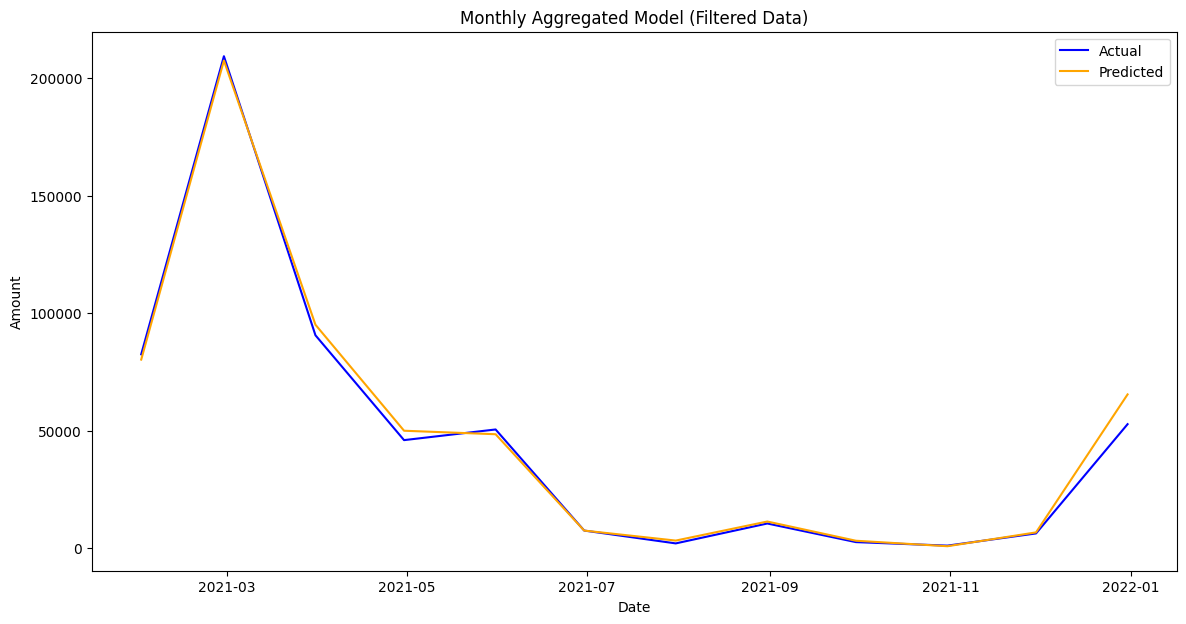

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data Mining Project/sales short.xlsx'
data = pd.read_excel(file_path)

# Preprocess the data
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data['Branch Code'] = data['Branch Code'].astype('category').cat.codes
data['Shop Name'] = data['Shop Name'].astype('category').cat.codes
data['Customer Name'] = data['Customer Name'].astype('category').cat.codes
data['Sales Person Name'] = data['Sales Person Name'].astype('category').cat.codes
data['Cashier Name'] = data['Cashier Name'].astype('category').cat.codes
data['Sales Type'] = data['Sales Type'].astype('category').cat.codes

# Feature selection
features = ['Quantity', 'Item Code', 'Branch Code', 'Shop Name', 'Customer Name',
            'Sales Person Name', 'Cashier Name', 'Sales Type', 'Unit Price']
X = data[features]
y = data['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Prepare the data for visualization
train_data = data.iloc[X_train.index]
test_data = data.iloc[X_test.index]
train_data['Predicted Amount'] = model.predict(X_train)
test_data['Predicted Amount'] = y_pred

# Combine actual and predicted data for plotting
train_data['Type'] = 'Train'
test_data['Type'] = 'Test'
combined_data = pd.concat([train_data, test_data])

# Sort by date for proper plotting
combined_data = combined_data.sort_values(by='Date')

# Remove outliers: keep only rows where Amount and Predicted Amount are less than 2000
filtered_data = combined_data[(combined_data['Amount'] < 2000) & (combined_data['Predicted Amount'] < 2000)]

# Aggregate by month
filtered_data.set_index('Date', inplace=True)
monthly_data = filtered_data.resample('M').sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(monthly_data['Date'],
         monthly_data['Amount'], label='Actual', color='blue')

# Plot predicted values
plt.plot(monthly_data['Date'],
         monthly_data['Predicted Amount'], label='Predicted', color='orange')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Monthly Aggregated Model (Filtered Data)')
plt.legend()

# Show the plot
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/Data Mining Project/sales short.xlsx'
data = pd.read_excel(file_path)

# Preprocess the data
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
data['Branch Code'] = data['Branch Code'].astype('category').cat.codes
data['Shop Name'] = data['Shop Name'].astype('category').cat.codes
data['Customer Name'] = data['Customer Name'].astype('category').cat.codes
data['Sales Person Name'] = data['Sales Person Name'].astype('category').cat.codes
data['Cashier Name'] = data['Cashier Name'].astype('category').cat.codes
data['Sales Type'] = data['Sales Type'].astype('category').cat.codes

# Feature selection
features = ['Quantity', 'Item Code', 'Branch Code', 'Shop Name', 'Customer Name',
            'Sales Person Name', 'Cashier Name', 'Sales Type', 'Unit Price']
X = data[features]
y = data['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Prepare the data for visualization
train_data = data.iloc[X_train.index]
test_data = data.iloc[X_test.index]
train_data['Predicted Amount'] = model.predict(X_train)
test_data['Predicted Amount'] = y_pred

# Combine actual and predicted data for plotting
train_data['Type'] = 'Train'
test_data['Type'] = 'Test'
combined_data = pd.concat([train_data, test_data])

# Sort by date for proper plotting
combined_data = combined_data.sort_values(by='Date')

# Remove outliers: keep only rows where Amount and Predicted Amount are less than 2000
filtered_data = combined_data[(combined_data['Amount'] < 2000) & (combined_data['Predicted Amount'] < 2000)]

# Aggregate by month
filtered_data.set_index('Date', inplace=True)
monthly_data = filtered_data.resample('M').sum().reset_index()

# Create the interactive plot using Plotly
fig = px.line(monthly_data, x='Date', y=['Amount', 'Predicted Amount'],
              labels={'value': 'Amount', 'variable': 'Legend'},
              title='Monthly Aggregated Model (Filtered Data)')

fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Date', yaxis_title='Amount')

fig.show()


<ipython-input-2-42504bae6e07>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Predicted Amount'] = model.predict(X_train)
<ipython-input-2-42504bae6e07>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Amount'] = y_pred
<ipython-input-2-42504bae6e07>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-